# Applying Machine Learning
In this assignment, you will explore techniques to evaluate and improve your machine learning models.


## 1 - Packages 

You will need the following packages during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

First, let's try a different method to install a package - run the cell below to install the scikitlearn package. You only need to run this cell once.

In [1]:
!pip install scikit-learn

Let's import all the packages that you will need during this assignment.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from hw8_utils import *

## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [3]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

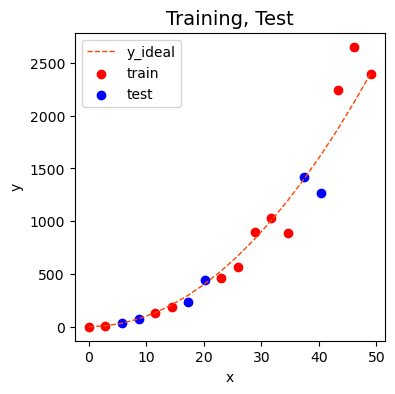

In [4]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",    label="train")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [5]:
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
    ### START CODE HERE ### 
        err += (yhat[i] - y[i]) ** 2
    
    err /= 2*m
    
    ### END CODE HERE ### 

    return(err)

In [6]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
err = eval_mse(y_hat, y_tmp)

print(f"Error = {err}")

Error = 0.0050000000000000305


### Expected Output
    Error = 0.0050000000000000305

### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [7]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [8]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

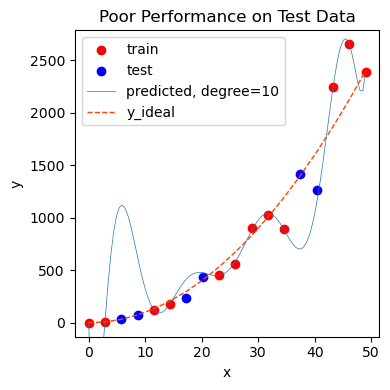

In [9]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [10]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


## 3 - Bias and Variance
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

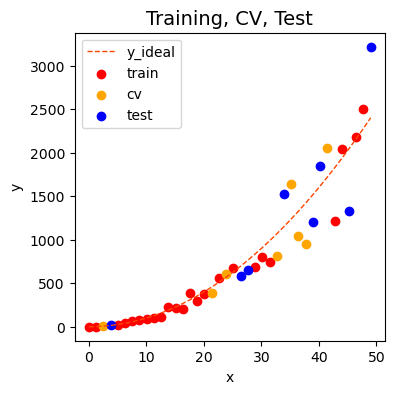

In [11]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = "orange", label="cv")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.legend(loc='upper left')
plt.show()

### 3.2 Finding the optimal degree
In our lecture we learned that by increasing the *degree* of the polynomial, we could *create* overfitting. Let's use this knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [12]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

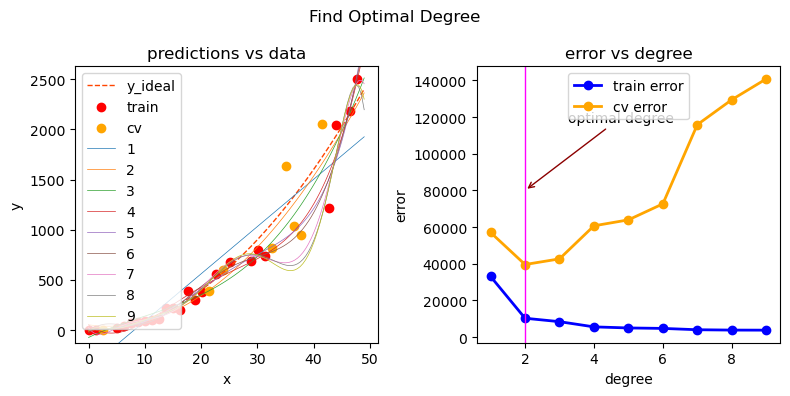

In [13]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

### 3.3 Tuning Regularization.
In previous assignments, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [14]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
  
    
optimal_reg_idx = np.argmin(err_cv) 

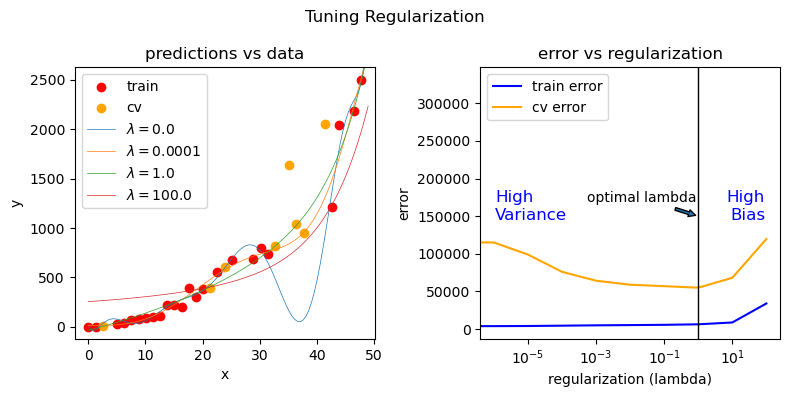

In [15]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

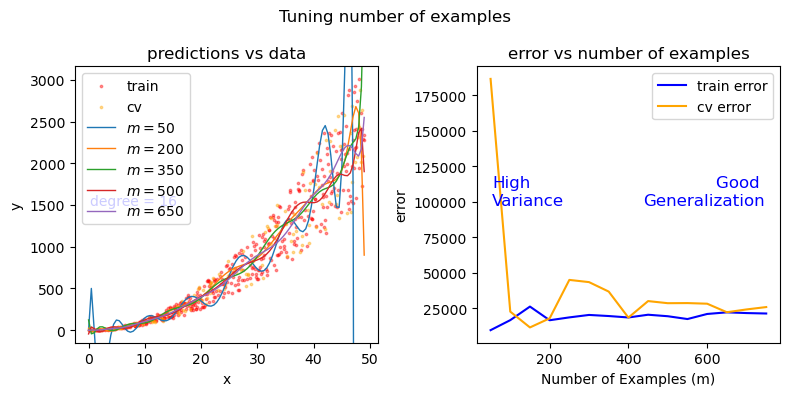

In [16]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [17]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


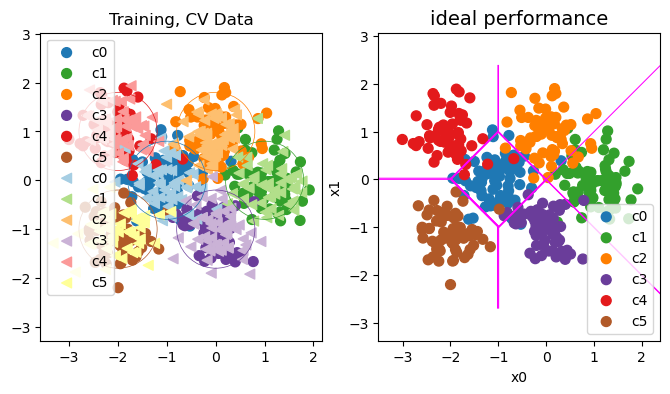

In [18]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [19]:
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
    ### START CODE HERE ### 
        if y[i] != yhat[i]:
            incorrect += 1
            
    cerr = incorrect / m
    
    ### END CODE HERE ### 
    
    return(cerr)

In [20]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )


categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


### Expected Output
    categorization error 0.333, expected:0.333
    categorization error 0.250, expected:0.250

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [21]:
tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units = 120, activation = 'relu'),
        Dense(units = 40, activation = 'relu'),
        Dense(units = 6, activation = 'linear'),
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = Adam(learning_rate = 0.01)
    ### END CODE HERE ### 
)

In [22]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 1.1576
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4210
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3162
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2870
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2731
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3017
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2289
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2387
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1987
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2135
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2043
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1570
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1494
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1441
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1359
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1525
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1424
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1448
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1355
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1432
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1121
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1275
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0985
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1038
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1027
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1141
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1042
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0898
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0869
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0874
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0831
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0896
Epoch 304/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 305/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1091
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0752
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1023
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0947
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1404
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1628
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1078
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0944
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0916
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0873
Epoch 407/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 495/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1035
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1466
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1441
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0722
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1022
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1296
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1287
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1496
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0858
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1311
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1424
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1365
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1652
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1400
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1073
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1495
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0716
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0866
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0413
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0314
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 995/1000
13/1

In [23]:
model.summary()


Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               360       
                                                                 
 dense_1 (Dense)             (None, 40)                4840      
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


1082/1082 [==============================] - 1s 1ms/step


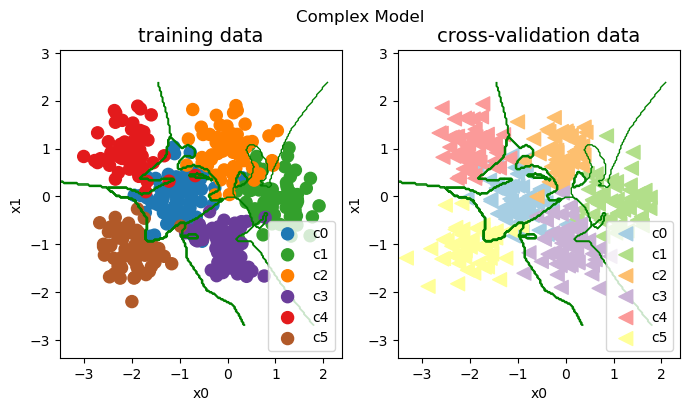

In [25]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [26]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 2ms/step
categorization error, training, complex model: 0.010
categorization error, cv,       complex model: 0.113


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [27]:
tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units = 6, activation = 'relu'),
        Dense(units = 6, activation = 'linear')
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = Adam(learning_rate = 0.01)
    ### START CODE HERE ### 
)


In [28]:
model_s.fit(
    X_train,y_train,
    epochs=1000
)


Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7284
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.5024
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3111
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.1274
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9749
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8513
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7640
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6933
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6416
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6012
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5654
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5390
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.2042
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2061
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2051
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2011
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1996
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2002
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1989
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1991
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2007
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2002
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1991
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2011
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1918
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1912
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1910
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1921
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1906
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1939
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1908
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1943
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1895
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1927
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1905
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1885
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1890
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1882
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1945
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1874
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1915
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1871
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1890
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1899
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1838
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1876
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1895
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1865
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1857
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1855
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1850
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1850
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1855
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1829
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1837
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1812
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1789
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1786
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1842
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1790
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1789
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1793
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1777
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1809
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1780
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1794
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1772
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1771
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1759
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1754
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1731
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1759
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1747
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1746
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1742
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1724
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1775
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1746
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1753
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1711
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1707
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1729
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1719
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1716
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1703
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1710
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1702
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1728
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1722
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1707
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1728
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1726
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1677
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1697
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1709
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1677
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1697
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1712
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1784
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1759
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1722
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1683
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1664
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1676
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1701
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1677
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1700
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1691
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1677
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1679
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1687
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1685
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1682
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1684
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1654
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1649
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1681
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1655
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1700
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1678
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1649
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1690
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1655
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653
Epoch 995/1000
13/1

In [29]:

model_s.summary()


Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


1082/1082 [==============================] - 1s 1ms/step


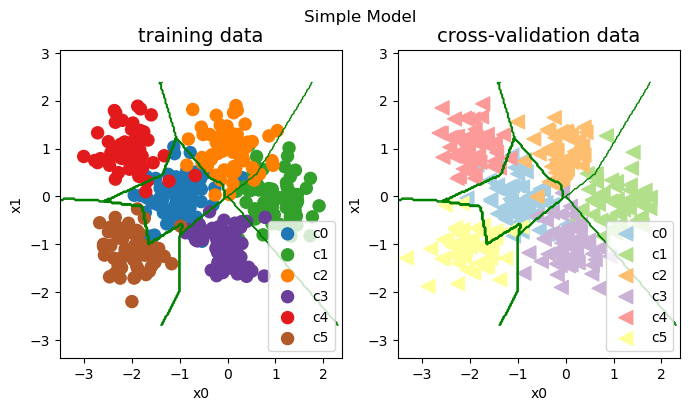

In [30]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [31]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 1ms/step
categorization error, training, simple model, 0.050, complex model: 0.010
categorization error, cv,       simple model, 0.084, complex model: 0.113


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [32]:
tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units = 120, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
        Dense(units = 40, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
         Dense(units = 6, activation = 'linear')
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = Adam(learning_rate = 0.01)
    ### START CODE HERE ### 
)


In [33]:
model_r.fit(
    X_train, y_train,
    epochs=1000
)


Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 4.4616
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6740
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3035
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0555
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9645
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9340
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9235
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8751
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8091
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7645
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7549
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7491
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.4804
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4693
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4684
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4611
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5042
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4585
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4609
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4738
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4575
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4558
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4567
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4528
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4059
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4060
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4235
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3970
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3954
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4080
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4477
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4250
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4097
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4137
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4356
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4114
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3818
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3992
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3966
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4302
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4039
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3938
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3828
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3802
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3893
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3915
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3980
Epoch 309/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3850
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3774
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3901
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3774
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3739
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3744
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3606
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3612
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3569
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3609
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3534
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3574
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3480
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3515
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3481
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3728
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3945
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3415
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3630
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3566
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3648
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3892
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3465
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3450
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3374
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3363
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4141
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3921
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3492
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3404
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3348
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3516
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3313
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3433
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3891
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3614
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3441
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3480
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3421
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3376
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3302
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3422
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3360
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3438
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3336
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3273
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3321
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3349
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3758
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3628
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3534
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3553
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3478
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3180
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3624
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3526
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3351
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3243
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3350
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3253
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3637
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3231
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3252
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3351
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3378
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3811
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3436
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3105
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3239
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3411
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3412
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3448
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3150
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3302
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3337
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3317
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3455
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3246
Epoch 994/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3236
Epoch 995/1000
13/1

In [34]:
model_r.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 120)               360       
                                                                 
 dense_6 (Dense)             (None, 40)                4840      
                                                                 
 dense_7 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


1082/1082 [==============================] - 2s 1ms/step


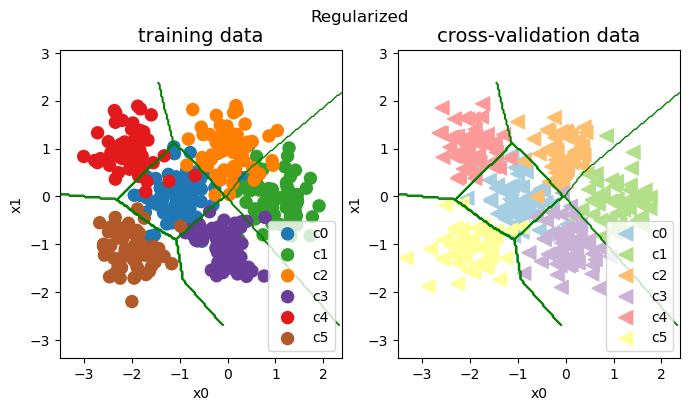

In [35]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [36]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 2ms/step
categorization error, training, regularized: 0.068, simple model, 0.050, complex model: 0.010
categorization error, cv,       regularized: 0.062, simple model, 0.084, complex model: 0.113


The regularized model is a bit better than the simple model in both the trainning set and the cross validation set.

## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. 

In [37]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
        ### START CODE HERE ### 
        Dense(units = 120, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(lambdas[i])),
        Dense(units = 40, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(lambdas[i])),
        Dense(units = 6, activation = 'linear')
        ### START CODE HERE ### 
        ]
    )
    models[i].compile(
        ### START CODE HERE ### 
        loss = SparseCategoricalCrossentropy(from_logits = True),
        optimizer = Adam(learning_rate = 0.01)
        ### START CODE HERE ### 
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0988
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4214
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2850
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2599
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2806
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2331
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2397
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2107
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2177
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2068
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1574
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1847
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1631
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1497
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1503
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1663
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1475
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1412
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1352
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1460
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1529
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1078
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1102
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1015
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1066
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1126
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0995
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1043
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1076
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1145
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1049
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1183
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0765
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0765
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 303/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0938
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0852
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0726
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 407/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0494
Epoch 505/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 592/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1188
Epoch 593/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0883
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0720
Epoch 595/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0572
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 599/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0470
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 693/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0385
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0371
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0381
Epoch 696/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0362
Epoch 697/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0401
Epoch 698/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0386
Epoch 699/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0447
Epoch 700/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0314
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0432
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1166
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3569
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3108
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3290
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1888
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0993
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1359
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0998
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 995/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2491
Epoch 83/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2395
Epoch 84/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2345
Epoch 85/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2554
Epoch 86/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2279
Epoch 87/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2278
Epoch 88/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2322
Epoch 89/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2263
Epoch 90/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2242
Epoch 91/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2185
Epoch 92/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2186
Epoch 93/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2192
Epoch 94/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.2271
Epoch 182/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2109
Epoch 183/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2070
Epoch 184/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2078
Epoch 185/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2048
Epoch 186/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2077
Epoch 187/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2011
Epoch 188/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2025
Epoch 189/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2036
Epoch 190/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2085
Epoch 191/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2168
Epoch 192/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2129
Epoch 193/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1980
Epoch 280/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1981
Epoch 281/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1937
Epoch 282/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1868
Epoch 283/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1941
Epoch 284/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1870
Epoch 285/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 286/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1954
Epoch 287/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1970
Epoch 288/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2156
Epoch 289/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2005
Epoch 290/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2016
Epoch 291/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1809
Epoch 378/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1833
Epoch 379/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1901
Epoch 380/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1837
Epoch 381/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1859
Epoch 382/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 383/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1959
Epoch 384/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1915
Epoch 385/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1827
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1812
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1812
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1835
Epoch 389/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1942
Epoch 476/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1794
Epoch 477/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1867
Epoch 478/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1973
Epoch 479/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1787
Epoch 480/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1829
Epoch 481/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1750
Epoch 482/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1739
Epoch 483/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1765
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1831
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1810
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1740
Epoch 487/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1672
Epoch 574/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1645
Epoch 575/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1639
Epoch 576/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1650
Epoch 577/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1682
Epoch 578/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1734
Epoch 579/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1712
Epoch 580/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1795
Epoch 581/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1693
Epoch 582/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562
Epoch 583/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1700
Epoch 584/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1743
Epoch 585/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1602
Epoch 672/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1707
Epoch 673/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1616
Epoch 674/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1730
Epoch 675/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1719
Epoch 676/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1620
Epoch 677/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1614
Epoch 678/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1618
Epoch 679/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 680/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1812
Epoch 681/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1946
Epoch 682/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1780
Epoch 683/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1614
Epoch 770/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613
Epoch 771/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1637
Epoch 772/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587
Epoch 773/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1663
Epoch 774/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1737
Epoch 775/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1735
Epoch 776/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565
Epoch 777/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1666
Epoch 778/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1654
Epoch 779/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1694
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597
Epoch 781/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1548
Epoch 868/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593
Epoch 869/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571
Epoch 870/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653
Epoch 871/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1634
Epoch 872/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1503
Epoch 873/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1548
Epoch 874/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555
Epoch 875/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1627
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578
Epoch 878/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593
Epoch 879/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1651
Epoch 966/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559
Epoch 967/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1693
Epoch 968/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1745
Epoch 969/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1691
Epoch 970/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1716
Epoch 971/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561
Epoch 972/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1502
Epoch 973/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595
Epoch 974/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1542
Epoch 975/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568
Epoch 976/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1520
Epoch 977/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 65/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3492
Epoch 66/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3304
Epoch 67/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3495
Epoch 68/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3547
Epoch 69/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3261
Epoch 70/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3257
Epoch 71/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3228
Epoch 72/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2971
Epoch 73/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3062
Epoch 74/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 75/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3268
Epoch 76/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 164/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2920
Epoch 165/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 166/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 167/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 168/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2831
Epoch 169/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 170/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 171/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2716
Epoch 172/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2627
Epoch 173/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2818
Epoch 174/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 175/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2731
Epoch 262/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2596
Epoch 263/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2550
Epoch 264/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2521
Epoch 265/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2614
Epoch 266/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 267/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 268/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2552
Epoch 269/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2522
Epoch 270/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2615
Epoch 271/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2559
Epoch 272/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2570
Epoch 273/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 360/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2698
Epoch 361/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2536
Epoch 362/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2712
Epoch 363/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2687
Epoch 364/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2518
Epoch 365/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2550
Epoch 366/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2617
Epoch 367/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 368/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2472
Epoch 369/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2463
Epoch 370/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2497
Epoch 371/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2363
Epoch 458/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 459/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2386
Epoch 460/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2408
Epoch 461/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2632
Epoch 462/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 463/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 464/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2423
Epoch 465/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2480
Epoch 466/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2434
Epoch 467/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2446
Epoch 468/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2424
Epoch 469/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2406
Epoch 556/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2291
Epoch 557/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2305
Epoch 558/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2353
Epoch 559/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 560/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2474
Epoch 561/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2350
Epoch 562/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2531
Epoch 563/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2324
Epoch 564/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 565/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2364
Epoch 566/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2430
Epoch 567/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2236
Epoch 654/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2463
Epoch 655/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2314
Epoch 656/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2341
Epoch 657/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2298
Epoch 658/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2335
Epoch 659/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2357
Epoch 660/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2421
Epoch 661/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2226
Epoch 662/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 663/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2356
Epoch 664/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2519
Epoch 665/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2329
Epoch 752/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2425
Epoch 753/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2248
Epoch 754/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2372
Epoch 755/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2273
Epoch 756/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2430
Epoch 757/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2384
Epoch 758/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2317
Epoch 759/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2292
Epoch 760/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2402
Epoch 761/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2322
Epoch 762/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2335
Epoch 763/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2289
Epoch 850/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2218
Epoch 851/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2318
Epoch 852/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2534
Epoch 853/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2455
Epoch 854/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2472
Epoch 855/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2421
Epoch 856/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2265
Epoch 857/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2330
Epoch 858/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2262
Epoch 859/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2296
Epoch 860/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2313
Epoch 861/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2358
Epoch 948/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2318
Epoch 949/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2181
Epoch 950/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2184
Epoch 951/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2267
Epoch 952/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2466
Epoch 953/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2358
Epoch 954/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2336
Epoch 955/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2286
Epoch 956/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2265
Epoch 957/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2387
Epoch 958/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2430
Epoch 959/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4513
Epoch 47/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4293
Epoch 48/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4800
Epoch 49/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4645
Epoch 50/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4306
Epoch 51/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4455
Epoch 52/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4329
Epoch 53/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4459
Epoch 54/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4260
Epoch 55/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4554
Epoch 56/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4193
Epoch 57/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4357
Epoch 58/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.3612
Epoch 146/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3583
Epoch 147/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3877
Epoch 148/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3674
Epoch 149/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3580
Epoch 150/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3581
Epoch 151/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3556
Epoch 152/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3542
Epoch 153/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3805
Epoch 154/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3594
Epoch 155/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3637
Epoch 156/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3681
Epoch 157/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3324
Epoch 244/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3460
Epoch 245/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3430
Epoch 246/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3401
Epoch 247/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3280
Epoch 248/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3389
Epoch 249/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3487
Epoch 250/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3413
Epoch 251/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3691
Epoch 252/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3475
Epoch 253/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3387
Epoch 254/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3538
Epoch 255/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3265
Epoch 342/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3354
Epoch 343/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3237
Epoch 344/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3190
Epoch 345/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3174
Epoch 346/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3270
Epoch 347/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3325
Epoch 348/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3377
Epoch 349/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3074
Epoch 350/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3330
Epoch 351/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3148
Epoch 352/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3387
Epoch 353/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 440/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3051
Epoch 441/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3127
Epoch 442/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3220
Epoch 443/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3178
Epoch 444/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3085
Epoch 445/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3207
Epoch 446/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3114
Epoch 447/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3403
Epoch 448/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3290
Epoch 449/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3079
Epoch 450/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3056
Epoch 451/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3631
Epoch 538/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3230
Epoch 539/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2965
Epoch 540/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3116
Epoch 541/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3267
Epoch 542/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3320
Epoch 543/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3257
Epoch 544/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3119
Epoch 545/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3060
Epoch 546/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3151
Epoch 547/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3327
Epoch 548/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3075
Epoch 549/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3288
Epoch 636/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3122
Epoch 637/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3065
Epoch 638/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2972
Epoch 639/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2962
Epoch 640/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 641/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2909
Epoch 642/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3110
Epoch 643/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3239
Epoch 644/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2923
Epoch 645/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3113
Epoch 646/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3257
Epoch 647/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2969
Epoch 734/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3221
Epoch 735/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3143
Epoch 736/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3140
Epoch 737/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3255
Epoch 738/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2923
Epoch 739/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3041
Epoch 740/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3074
Epoch 741/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3227
Epoch 742/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3542
Epoch 743/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2995
Epoch 744/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2932
Epoch 745/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3085
Epoch 832/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3209
Epoch 833/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3252
Epoch 834/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2935
Epoch 835/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2952
Epoch 836/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2847
Epoch 837/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2986
Epoch 838/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3008
Epoch 839/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2929
Epoch 840/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3025
Epoch 841/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2850
Epoch 842/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 843/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3097
Epoch 930/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3231
Epoch 931/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3101
Epoch 932/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2982
Epoch 933/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2984
Epoch 934/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3373
Epoch 935/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 936/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2905
Epoch 937/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2887
Epoch 938/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3109
Epoch 939/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2909
Epoch 940/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2888
Epoch 941/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.6208
Epoch 29/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6074
Epoch 30/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6298
Epoch 31/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6228
Epoch 32/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6293
Epoch 33/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6244
Epoch 34/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6662
Epoch 35/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6518
Epoch 36/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6141
Epoch 37/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5869
Epoch 38/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5712
Epoch 39/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5706
Epoch 40/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.4437
Epoch 128/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4329
Epoch 129/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4395
Epoch 130/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4350
Epoch 131/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4545
Epoch 132/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4311
Epoch 133/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4234
Epoch 134/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4469
Epoch 135/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4458
Epoch 136/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4480
Epoch 137/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4269
Epoch 138/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4447
Epoch 139/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4286
Epoch 226/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4133
Epoch 227/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4258
Epoch 228/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3872
Epoch 229/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4010
Epoch 230/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4080
Epoch 231/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3999
Epoch 232/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4129
Epoch 233/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3916
Epoch 234/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3862
Epoch 235/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3894
Epoch 236/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3957
Epoch 237/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4017
Epoch 324/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4101
Epoch 325/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3970
Epoch 326/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3851
Epoch 327/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3797
Epoch 328/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3941
Epoch 329/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3780
Epoch 330/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3667
Epoch 331/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3710
Epoch 332/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3727
Epoch 333/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4139
Epoch 334/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3953
Epoch 335/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3826
Epoch 422/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3919
Epoch 423/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3724
Epoch 424/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3747
Epoch 425/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3646
Epoch 426/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3630
Epoch 427/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3650
Epoch 428/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3738
Epoch 429/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3730
Epoch 430/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3692
Epoch 431/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3538
Epoch 432/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3614
Epoch 433/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3624
Epoch 520/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3669
Epoch 521/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3484
Epoch 522/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3618
Epoch 523/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3758
Epoch 524/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3383
Epoch 525/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3488
Epoch 526/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3523
Epoch 527/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3393
Epoch 528/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3448
Epoch 529/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3766
Epoch 530/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3636
Epoch 531/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3289
Epoch 618/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3641
Epoch 619/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3887
Epoch 620/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3834
Epoch 621/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3481
Epoch 622/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3506
Epoch 623/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3411
Epoch 624/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3302
Epoch 625/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3288
Epoch 626/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3396
Epoch 627/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3507
Epoch 628/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3626
Epoch 629/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3266
Epoch 716/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3356
Epoch 717/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3527
Epoch 718/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3723
Epoch 719/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4232
Epoch 720/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4009
Epoch 721/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3743
Epoch 722/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3494
Epoch 723/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3615
Epoch 724/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3451
Epoch 725/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3456
Epoch 726/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 727/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3314
Epoch 814/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3358
Epoch 815/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3403
Epoch 816/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3407
Epoch 817/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3587
Epoch 818/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3525
Epoch 819/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 820/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3617
Epoch 821/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3893
Epoch 822/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3459
Epoch 823/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3410
Epoch 824/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3472
Epoch 825/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3302
Epoch 912/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3322
Epoch 913/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3223
Epoch 914/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3481
Epoch 915/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3494
Epoch 916/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3580
Epoch 917/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3452
Epoch 918/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3416
Epoch 919/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3608
Epoch 920/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3691
Epoch 921/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3447
Epoch 922/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3530
Epoch 923/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 1.1066
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0520
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0156
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9892
Epoch 13/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9824
Epoch 14/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9771
Epoch 15/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9303
Epoch 16/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9343
Epoch 17/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9430
Epoch 18/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9267
Epoch 19/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8989
Epoch 20/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8865
Epoch 21/1000
13/13 [=========

Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5737
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5770
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5735
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5677
Epoch 113/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5631
Epoch 114/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5592
Epoch 115/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5584
Epoch 116/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5624
Epoch 117/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5964
Epoch 118/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5851
Epoch 119/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5781
Epoch 120/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5697
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.5113
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5250
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5337
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5088
Epoch 211/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5162
Epoch 212/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4923
Epoch 213/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4876
Epoch 214/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4914
Epoch 215/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4946
Epoch 216/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5034
Epoch 217/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4926
Epoch 218/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4983
Epoch 219/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4547
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4782
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4615
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4518
Epoch 309/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4630
Epoch 310/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4547
Epoch 311/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4478
Epoch 312/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4486
Epoch 313/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4531
Epoch 314/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4565
Epoch 315/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4511
Epoch 316/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4460
Epoch 317/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4365
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4365
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4253
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4280
Epoch 407/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4398
Epoch 408/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4476
Epoch 409/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4285
Epoch 410/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4453
Epoch 411/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4708
Epoch 412/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4316
Epoch 413/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4397
Epoch 414/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4432
Epoch 415/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4112
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4185
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4478
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4536
Epoch 505/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4472
Epoch 506/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4594
Epoch 507/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4444
Epoch 508/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4060
Epoch 509/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4180
Epoch 510/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4133
Epoch 511/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4214
Epoch 512/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4202
Epoch 513/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3960
Epoch 600/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4066
Epoch 601/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3947
Epoch 602/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4053
Epoch 603/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3982
Epoch 604/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3966
Epoch 605/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4025
Epoch 606/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4195
Epoch 607/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4171
Epoch 608/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4175
Epoch 609/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4052
Epoch 610/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4231
Epoch 611/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3925
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4063
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3937
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3836
Epoch 701/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3992
Epoch 702/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3932
Epoch 703/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3766
Epoch 704/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4027
Epoch 705/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3976
Epoch 706/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4029
Epoch 707/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4109
Epoch 708/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3975
Epoch 709/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4438
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4502
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3825
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3948
Epoch 799/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3895
Epoch 800/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3913
Epoch 801/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3837
Epoch 802/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3808
Epoch 803/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3749
Epoch 804/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3668
Epoch 805/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3838
Epoch 806/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3862
Epoch 807/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3820
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3781
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4272
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3973
Epoch 897/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3884
Epoch 898/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3868
Epoch 899/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4169
Epoch 900/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3996
Epoch 901/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4278
Epoch 902/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4126
Epoch 903/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4085
Epoch 904/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3729
Epoch 905/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3862
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3634
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3725
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3784
Epoch 995/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3795
Epoch 996/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3737
Epoch 997/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4055
Epoch 998/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3704
Epoch 999/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3871
Epoch 1000/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3889
Finished lambda = 0.2
Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 10.0200
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.3224

13/13 [==============================] - 0s 2ms/step - loss: 0.8271
Epoch 91/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8080
Epoch 92/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8012
Epoch 93/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7899
Epoch 94/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7801
Epoch 95/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7788
Epoch 96/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7779
Epoch 97/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7789
Epoch 98/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7912
Epoch 99/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7804
Epoch 100/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7738
Epoch 101/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7791
Epoch 102/1000
13/13 [======

Epoch 189/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6056
Epoch 190/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5979
Epoch 191/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6089
Epoch 192/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6041
Epoch 193/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5925
Epoch 194/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5938
Epoch 195/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5914
Epoch 196/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5921
Epoch 197/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6022
Epoch 198/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5944
Epoch 199/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5968
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5942
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.5485
Epoch 288/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5465
Epoch 289/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5530
Epoch 290/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5656
Epoch 291/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5668
Epoch 292/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5364
Epoch 293/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5465
Epoch 294/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5488
Epoch 295/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5631
Epoch 296/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5406
Epoch 297/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5354
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5399
Epoch 299/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.5089
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4956
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5108
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5211
Epoch 389/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5065
Epoch 390/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4879
Epoch 391/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4986
Epoch 392/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5126
Epoch 393/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4934
Epoch 394/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4934
Epoch 395/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5338
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5376
Epoch 397/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.5086
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4791
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5043
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4802
Epoch 487/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4806
Epoch 488/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4716
Epoch 489/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4572
Epoch 490/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4728
Epoch 491/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4927
Epoch 492/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4979
Epoch 493/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4969
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4714
Epoch 495/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4843
Epoch 582/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4790
Epoch 583/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4899
Epoch 584/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4788
Epoch 585/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4884
Epoch 586/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4661
Epoch 587/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4630
Epoch 588/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4462
Epoch 589/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4395
Epoch 590/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4412
Epoch 591/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4535
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4488
Epoch 593/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4496
Epoch 680/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4355
Epoch 681/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4529
Epoch 682/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4402
Epoch 683/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4429
Epoch 684/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4404
Epoch 685/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4485
Epoch 686/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4513
Epoch 687/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4417
Epoch 688/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4287
Epoch 689/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4832
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4633
Epoch 691/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4597
Epoch 778/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4519
Epoch 779/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4378
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4340
Epoch 781/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4516
Epoch 782/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4226
Epoch 783/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4329
Epoch 784/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4299
Epoch 785/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4181
Epoch 786/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4252
Epoch 787/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4287
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4210
Epoch 789/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4208
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4337
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4315
Epoch 878/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4256
Epoch 879/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4170
Epoch 880/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4139
Epoch 881/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4349
Epoch 882/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4418
Epoch 883/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4769
Epoch 884/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4671
Epoch 885/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4726
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4253
Epoch 887/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4078
Epoch 974/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4152
Epoch 975/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4126
Epoch 976/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4065
Epoch 977/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4138
Epoch 978/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4007
Epoch 979/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4169
Epoch 980/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4274
Epoch 981/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4164
Epoch 982/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4106
Epoch 983/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4024
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4268
Epoch 985/1000
13/1

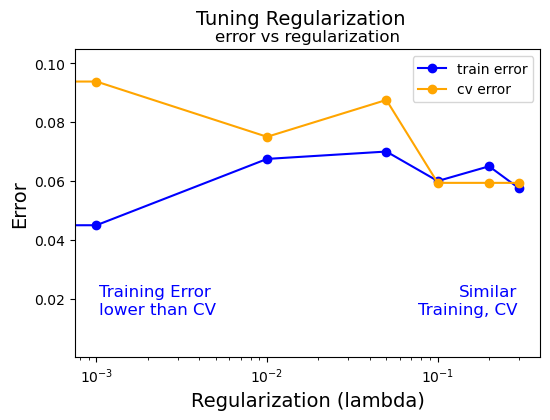

In [38]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

3/3 [==============================] - 0s 2ms/step


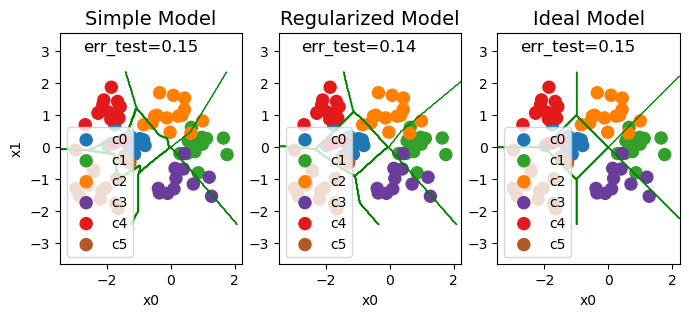

In [39]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)